# Task 3: Predicting Insurance Claim Amounts
###1. Introduction
Problem Statement

The objective of this task is to predict medical insurance charges based on personal attributes such as age, BMI, and smoking status. This task uses Linear Regression, a supervised machine learning algorithm, to estimate continuous values.

#2. Dataset Description

Medical Cost Personal Dataset
The dataset includes the following features:

age – Age of the individual

sex – Gender

bmi – Body Mass Index

children – Number of dependents

smoker – Smoking status

region – Residential region

charges – Medical insurance cost (target variable)

#3. Import Required Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#4. Load the Dataset

In [ ]:
# Load the insurance dataset
df = pd.read_csv("/content/insurance.csv")

#5. Dataset Inspection

In [ ]:
# View dataset structure
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Data Cleaning & Preparation

In [ ]:
# Convert categorical variables into numerical form
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode the region column
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


# Feature Selection

In [ ]:
# Select input features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

#7. Train-Test Split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#8. Model Training (Linear Regression)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

#9. Model Prediction

In [ ]:
# Predict insurance charges
y_pred = model.predict(X_test)

# 10. Model Evaluation


#10.1 MAE & RMSE

In [ ]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(4181.194473753645, np.float64(5796.284659276271))

#11. Data Visualization

#11.1 BMI vs Insurance Charges

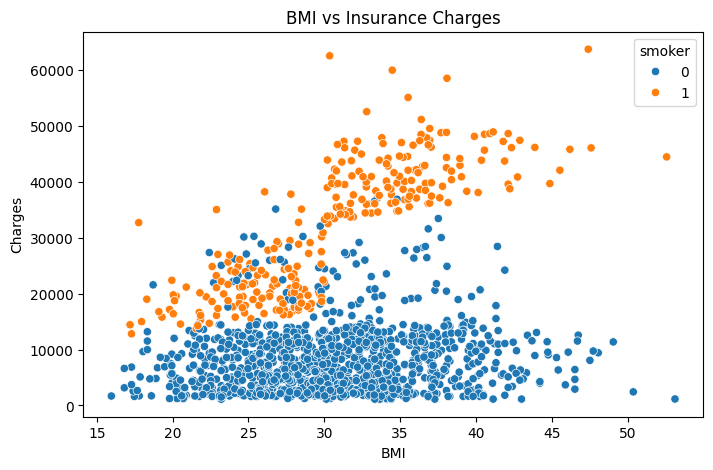

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
plt.title("BMI vs Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

#11.2 Age vs Insurance Charges

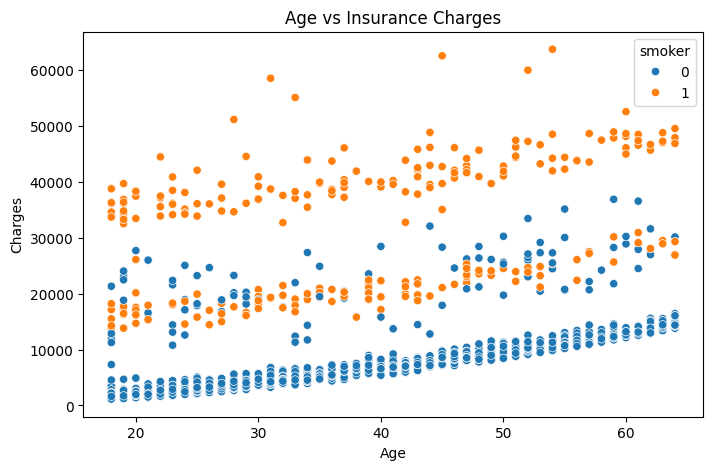

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'])
plt.title("Age vs Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison.head(10))

           Actual     Predicted
764    9095.06825   8969.550274
887    5272.17580   7068.747443
890   29330.98315  36858.410912
1293   9301.89355   9454.678501
259   33750.29180  26973.173457
1312   4536.25900  10864.113164
899    2117.33885    170.280841
752   14210.53595  16903.450287
1286   3732.62510   1092.430936
707   10264.44210  11218.343184


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7835929767120725
